# **Data**

## **Exercise 1 - Exploring Class Separability**

### **Generate the Data**

First we will generate a synthetic dataset with a total of 400 samples, divided equally among 4 classes (100 samples each), using a Gaussian distribution based on the given means and standard deviations:

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for each class
class_params = {
    0: {'mean': [2, 3], 'std': [0.8, 2.5]},
    1: {'mean': [5, 6], 'std': [1.2, 1.9]},
    2: {'mean': [8, 1], 'std': [0.9, 0.9]},
    3: {'mean': [15, 4], 'std': [0.5, 2.0]}
}

# Generate the data
data = []
labels = []

for label, params in class_params.items():
    samples = np.random.randn(100, 2) * params['std'] + params['mean']
    data.append(samples)
    labels.append(np.full(100, label))

# Combine into arrays
data = np.vstack(data)
labels = np.hstack(labels)

print("Dataset generated: ", data.shape, labels.shape)

Dataset generated:  (400, 2) (400,)


### **Plot the Data**

We will now plot a 2D scatter plot showing all the data points, with a different color for each class:

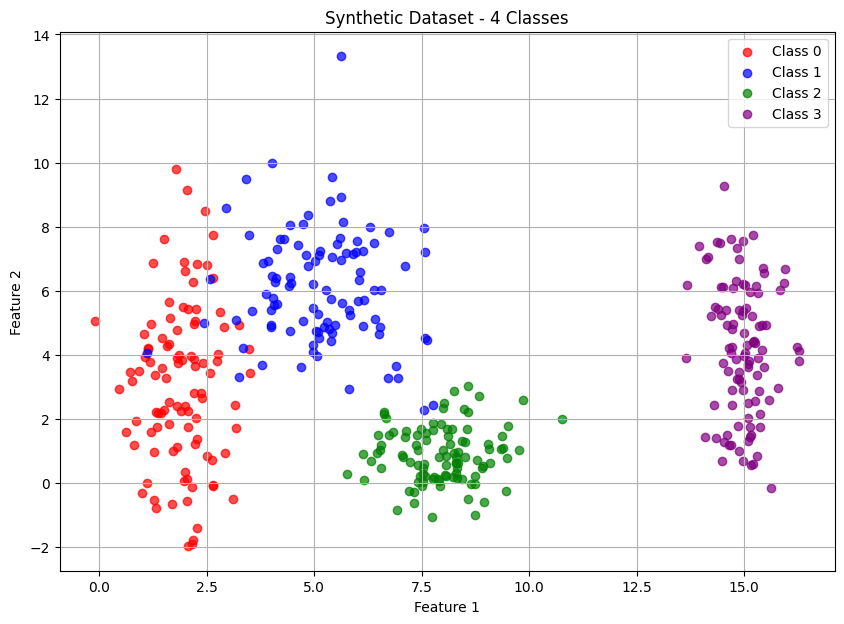

In [45]:
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple']

for i in range(4):
    plt.scatter(
        data[labels == i, 0],
        data[labels == i, 1],
        label=f'Class {i}',
        color=colors[i],
        alpha=0.7
    )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset - 4 Classes')
plt.legend()
plt.grid(True)
plt.show()

The synthetic dataset forms four Gaussian clusters with distinct shapes and spreads. Class 0 is centered near (2, 3) with a wide vertical spread due to its larger variance in the y-direction, while Class 1 lies near (5, 6) with moderate spread in both axes. Class 2 is a compact, almost circular cluster at (8, 1), and Class 3 is tightly concentrated around x = 15 but elongated vertically. Class 3 is clearly isolated because of its much larger x-mean, while Classes 0, 1, and 2 occupy overlapping regions in the central space. Class 0 and Class 1 overlap in the higher y-region, and although Class 2 is generally separate, its boundary edges could touch Class 1 if variance increases.

This arrangement shows that purely linear separation is not feasible: Class 3 could be split off by a vertical line, but Classes 0, 1, and 2 require non-linear boundaries. A neural network, such as an MLP with `tanh` activations, would likely learn curved, flexible decision regions: bending around Class 2, carving out Classes 0 and 1 in the upper region, and isolating Class 3 on the far right. The sketch below illustrates what such non-linear boundaries might look like:

![decision_boundaries](../images/sketch.jpg)

## **Exercise 2 - Non-Linearity in Higher Dimensions**

### **Generate the Data**

We'll create a synthetic dataset with 500 samples for Class A and 500 samples for Class B, using a multivariate normal distribution with the parameters provided:

In [46]:
# Parameters for Class A
mean_A = np.array([0, 0, 0, 0, 0])
cov_A = np.array([
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
])

# Parameters for Class B
mean_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])
cov_B = np.array([
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
])

# Generate samples
samples_A = np.random.multivariate_normal(mean_A, cov_A, size=500)
samples_B = np.random.multivariate_normal(mean_B, cov_B, size=500)

# Create labels
labels_A = np.zeros(500)  # Class A = 0
labels_B = np.ones(500)   # Class B = 1

# Combine data
X = np.vstack([samples_A, samples_B])
y = np.hstack([labels_A, labels_B])

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

Dataset shape: (1000, 5)
Labels shape: (1000,)


### **Visualize the Data**

Since we cannot plot a 5D graph, we will use **Principal Component Analysis (PCA)** to project the 5D data down to 2 dimensions. Then we'll create a scatter plot of this 2D representation, with Class A represented by red points and Class B being represented as blue points:

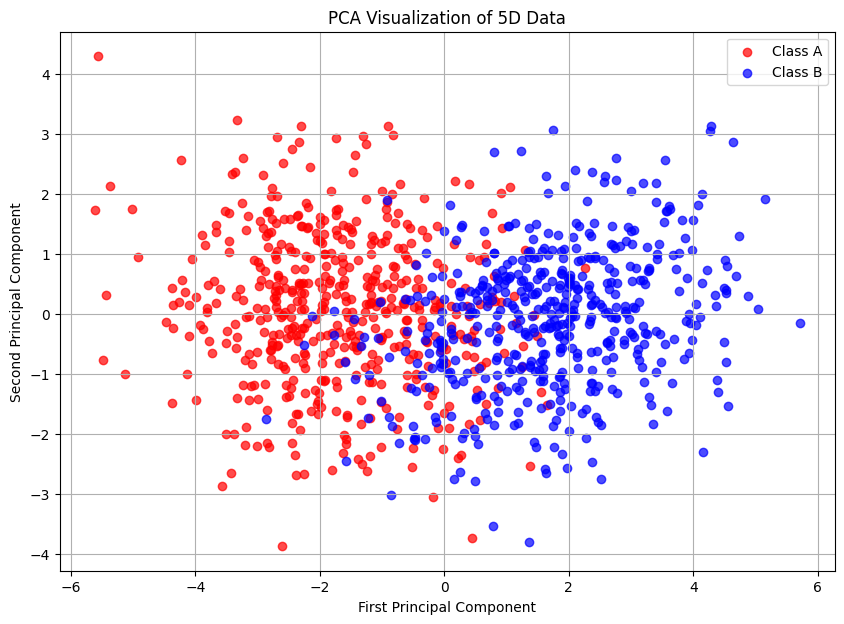

In [47]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot
plt.figure(figsize=(10, 7))
colors = ['red', 'blue']
classes = ['A', 'B']
for i, color in enumerate(colors):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=f'Class {classes[i]}',
        color=color,
        alpha=0.7
    )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of 5D Data')
plt.legend()
plt.grid()
plt.show()

### **Analyze the Plot**

The PCA projection of the 5D dataset reveals that Classes A and B overlap substantially in two dimensions. Their centers are slightly offset, but the distributions largely intersect, and both classes display similar spread patterns. This means that in the reduced 2D space there are no clean visual boundaries to separate them.

This overlap reflects the underlying challenge: the full 5D structure is governed by different covariance patterns in each class, producing relationships that are not well captured by straight lines. A simple linear classifier cannot resolve such intertwined regions, as any single hyperplane would misclassify a significant portion of the data. To achieve better separation, a more expressive model is needed. A multi-layer neural network with non-linear activation functions can transform the input space into higher-order representations, bending decision boundaries around the overlapping regions. Such non-linear models are better suited to capture the complex geometry of the dataset, making accurate classification feasible where linear methods fall short.

## **Exercise 3 - Preparing Real-World Data for a Neural Network**

### **Get the Data**

First, we'll download the [**Spaceship Titanic**](https://www.kaggle.com/competitions/spaceship-titanic) dataset from Kaggle, especifically the **`train.csv`**, since we're only using this for preparation. 

### **Describe the Data**

The [**Spaceship Titanic**](https://www.kaggle.com/competitions/spaceship-titanic) dataset is a sci-fi reimagining of the classic [**Titanic**](https://www.kaggle.com/competitions/titanic) survival prediction task. It is framed as a **binary classification problem**, where the target column `Transported` indicates whether a passenger was transported to another dimension (`True`) or remained in the original dimension (`False`) following the spaceship incident.

The training file, **`train.csv`**, contains records for roughly two-thirds of the ~8,700 passengers. Each passenger is identified by a unique `PassengerId` that encodes group membership (`gggg_pp`, where `gggg` is the group and `pp` is the index within that group). Groups often represent families or traveling companions.

The dataset provides a mix of demographic, behavioral, and voyage-related features:

- **HomePlanet** — Planet of origin (permanent residence).  
- **CryoSleep** — Whether the passenger elected suspended animation for the voyage.  
- **Cabin** — Passenger cabin in the format `deck/num/side`, where `side` is `P` (Port) or `S` (Starboard).  
- **Destination** — Planet of debarkation.  
- **Age** — Passenger’s age in years.  
- **VIP** — Whether the passenger paid for special VIP service.  
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** — Expenditures at various luxury amenities onboard.  
- **Name** — Passenger’s full name (not directly predictive).  
- **Transported** — Target variable: `True` if transported to another dimension, `False` otherwise.  

Together, these variables form a rich dataset combining **categorical**, **numerical**, and **textual** features. The challenge lies in preprocessing and modeling these attributes effectively to predict the outcome `Transported`. The task is analogous to Titanic survival prediction but recast in a futuristic setting.

In [21]:
import pandas as pd

df = pd.read_csv("spaceship-titanic/train.csv")

df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Let's list all the numerical and categorical features of this dataset:

In [ ]:
target_column = 'Transported'
y = df[target_column].astype(int)
X = df.drop(columns=[target_column])

numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("\nNumerical Features:")
for feature in numerical_features:
    print(f"- {feature}")

print("\nCategorical Features:")
for feature in categorical_features:
    print(f"- {feature}")


Numerical Features:
- Age
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck

Categorical Features:
- PassengerId
- HomePlanet
- CryoSleep
- Cabin
- Destination
- VIP
- Name


We'll now investigate the dataset for missing values:

In [23]:
missing_counts = df.isna().sum()
n_rows = len(df)

missing_table = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_pct": (missing_counts / n_rows * 100).round(2)
    })
    .query("missing_count > 0")
    .sort_values("missing_count", ascending=False)
)

print("\nMissing Values")
print(missing_table.to_string(float_format=lambda x: f"{x:,.2f}%"))


Missing Values
              missing_count  missing_pct
CryoSleep               217        2.50%
ShoppingMall            208        2.39%
VIP                     203        2.34%
HomePlanet              201        2.31%
Name                    200        2.30%
Cabin                   199        2.29%
VRDeck                  188        2.16%
FoodCourt               183        2.11%
Spa                     183        2.11%
Destination             182        2.09%
RoomService             181        2.08%
Age                     179        2.06%


### **Preprocess the Data**

We will now clean and transform the data so it can be fed into a neural network. The `tanh` activation function produces outputs in the range `[-1, 1]`, so the input data should be scaled appropriately for stable training.

First we'll implement a strategy to handle the missing values in all the affected columns:

- Numerical Features (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
Use median imputation. Median is robust against outliers (e.g., some passengers spend huge amounts in VRDeck or FoodCourt).

- Categorical Features (HomePlanet, Destination, Cabin)
Use most frequent (mode) imputation. This fills missing entries with the most common value, which preserves the categorical distribution. Drop PassengerId and Name as they are identifiers.

- Boolean Features (CryoSleep, VIP)
Treat them as categorical and impute with most frequent value. This avoids introducing bias since only ~2% are missing.

In [48]:
from sklearn.impute import SimpleImputer

# Define the columns we will actually use downstream
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'Destination', 'Cabin', 'CryoSleep', 'VIP']

# Drop identifier columns from features
id_cols = ['PassengerId', 'Name']
X = df.drop(columns=[target_column] + id_cols, errors='ignore').copy()

# Create imputers
num_imputer = SimpleImputer(strategy="median")          # robust to outliers in spend columns
cat_imputer = SimpleImputer(strategy="most_frequent")   # preserves mode for categoricals/booleans

# APPLY the imputers (this was missing)
X[numerical_features] = num_imputer.fit_transform(X[numerical_features])
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

# Sanity check: no missing values should remain in these groups
print("Remaining NAs (numeric):", int(X[numerical_features].isna().sum().sum()))
print("Remaining NAs (categorical):", int(X[categorical_features].isna().sum().sum()))

Remaining NAs (numeric): 0
Remaining NAs (categorical): 0


Now, we'll encode categorical features into a numerical format using one-hot encoding:

In [56]:
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print("Encoded shape:", X_encoded.shape)

Encoded shape: (8693, 6571)


We will now scale the numerical variables. Because the `tanh` activation function is centered at zero and outputs values in the range **[-1, 1]**, bringing inputs onto a similar scale is essential. Scaling prevents features with large ranges from dominating learning, stabilizes gradient updates, and accelerates convergence.

Here we normalize values to **[-1, 1]**, aligning the inputs with the activation’s range. This practice improves training efficiency and helps the network learn more reliable non-linear decision boundaries.

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical features in the encoded/imputed feature matrix
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = X_encoded.copy()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])

# Quick preview
print(X_scaled[numerical_features].head())

        Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0 -0.012658    -1.000000  -1.000000     -1.000000 -1.000000 -1.000000
1 -0.392405    -0.984784  -0.999396     -0.997872 -0.951000 -0.996354
2  0.468354    -0.993997  -0.760105     -1.000000 -0.400660 -0.995939
3 -0.164557    -1.000000  -0.913930     -0.968415 -0.702874 -0.984005
4 -0.594937    -0.957702  -0.995304     -0.987145 -0.949572 -0.999834


### **Visualize the Results:**

We'll now create histograms for `FoodCourt` and `Age` before and after scaling to show the difference, the values should be between **[-1, 1]** instead of their original values, following the same distribution:

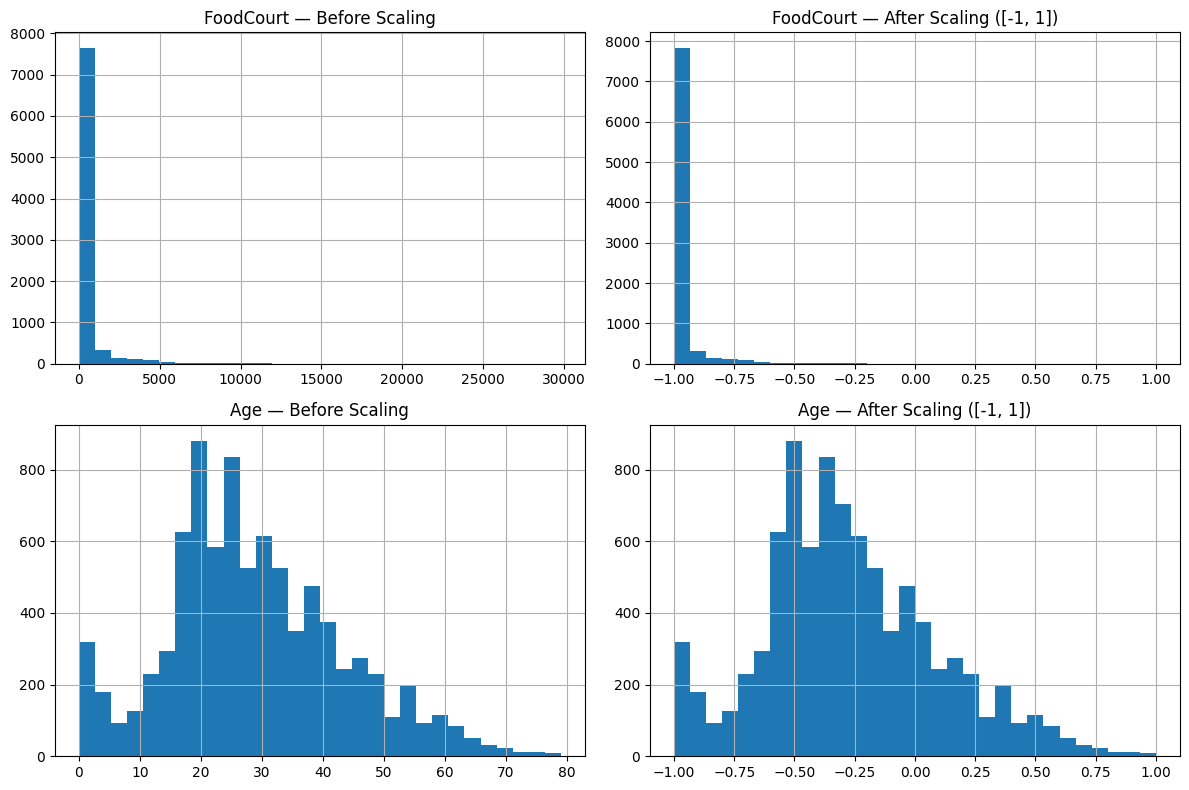

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 cols
axes = axes.ravel()  # flatten to a 1D array for easy indexing

# FoodCourt before
df['FoodCourt'].dropna().hist(bins=30, ax=axes[0])
axes[0].set_title('FoodCourt — Before Scaling')

# FoodCourt after
X_scaled['FoodCourt'].dropna().hist(bins=30, ax=axes[1])
axes[1].set_title('FoodCourt — After Scaling ([-1, 1])')

# Age before
df['Age'].dropna().hist(bins=30, ax=axes[2])
axes[2].set_title('Age — Before Scaling')

# Age after
X_scaled['Age'].dropna().hist(bins=30, ax=axes[3])
axes[3].set_title('Age — After Scaling ([-1, 1])')

plt.tight_layout()
plt.show()